**DATA 2050 Exploratory Data Analysis**
--
Roshan S. Parikh

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import math
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import xgboost as xgb
import pickle
from sklearn.inspection import permutation_importance

In [2]:
data = pd.read_excel('../2050_Data_4-26.xlsx', sheet_name='Data Table')

df = data.copy()

df.head()

,id,race,sex,birth_wt_kg,gest_age,birth_wt_pct,size_category,insurance_type,4mo_feeding_type,6mo_feeding_type,1yr_feeding_type,1yr_wt_pct,3yr_wt_pct,3yr_bmi_pct,current_age,current_wt_pct,current_wt_kg,current_bmi_pct,current_bmi,age_on_obes
0,1,Black,F,3.60,39,76.0,AGA,Private,Formula Feeding,Formula Feeding,Solid Food,99.49,99.63,98.32,9.333333,99.78,54.34,99.01,25.92,2.083333
1,2,Other,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.083333,99.21,55.97,98.55,26.48,5.166667
2,3,Hispanic,F,3.03,39.857143,23.0,AGA,Public,Formula Feeding,Formula Feeding,NaN,52.60,91.52,71.49,10.833333,99.15,58.97,98.19,26.25,7.916667
3,4,White,M,3.91,39.857143,78.0,AGA,Public,Breast Feeding,NaN,Solid Food,91.99,NaN,NaN,9.500000,99.85,67.77,99.49,31.55,6.083333
4,5,Black,F,2.22,34,59.0,AGA,Public,NaN,NaN,NaN,85.00,77.89,87.64,10.750000,97.33,57.43,98.68,28.88,6.916667


In [12]:
df_cleaned = df.dropna(subset=['birth_wt_pct']).drop(columns=['1yr_feeding_type'])
df_cleaned = df_cleaned[df_cleaned['6mo_feeding_type'] != 'Both Breast and Formula']

In [4]:
df_cleaned.shape

(63, 19)

In [9]:
df_cleaned.columns

Index(['id', 'race', 'sex', 'birth_wt_kg', 'gest_age', 'birth_wt_pct',
       'size_category', 'insurance_type', '4mo_feeding_type',
       '6mo_feeding_type', '1yr_wt_pct', '3yr_wt_pct', '3yr_bmi_pct',
       'current_age', 'current_wt_pct', 'current_wt_kg', 'current_bmi_pct',
       'current_bmi', 'age_on_obes'],
      dtype='object')

In [14]:
df_cleaned['6mo_feeding_type'].value_counts()

6mo_feeding_type
Formula Feeding    50
Breast Feeding      2
Name: count, dtype: int64

In [15]:
df_cleaned['gest_age'].describe()

count     62
unique    30
top       FT
freq      10
Name: gest_age, dtype: object

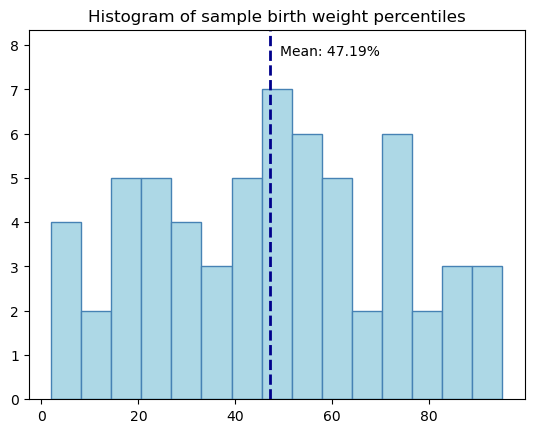

In [16]:
# Birth weight percentiles histogram
mean_pct = np.mean(df_cleaned['birth_wt_pct'])
mean_std = np.std(df_cleaned['birth_wt_pct'])
plt.hist(df_cleaned['birth_wt_pct'], bins=15, color='lightblue', edgecolor='steelblue')
plt.title("Histogram of sample birth weight percentiles")
plt.axvline(mean_pct, color='darkblue', linestyle='dashed', linewidth=2)
plt.ylim(plt.ylim()[0], plt.ylim()[1] + 1)
plt.text(mean_pct + 2, plt.ylim()[1]*0.93, f"Mean: {mean_pct:.2f}%")
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_937884/3163871391.py:12: SyntaxWarning: invalid escape sequence '\m'
  axes[i].text(mean_pct - 30, axes[i].get_ylim()[1]*0.9, f"$\mu$: {mean_pct:.2f}\n$\sigma$: {std_pct:.2f}")
/tmp/ipykernel_937884/3163871391.py:12: SyntaxWarning: invalid escape sequence '\s'
  axes[i].text(mean_pct - 30, axes[i].get_ylim()[1]*0.9, f"$\mu$: {mean_pct:.2f}\n$\sigma$: {std_pct:.2f}")


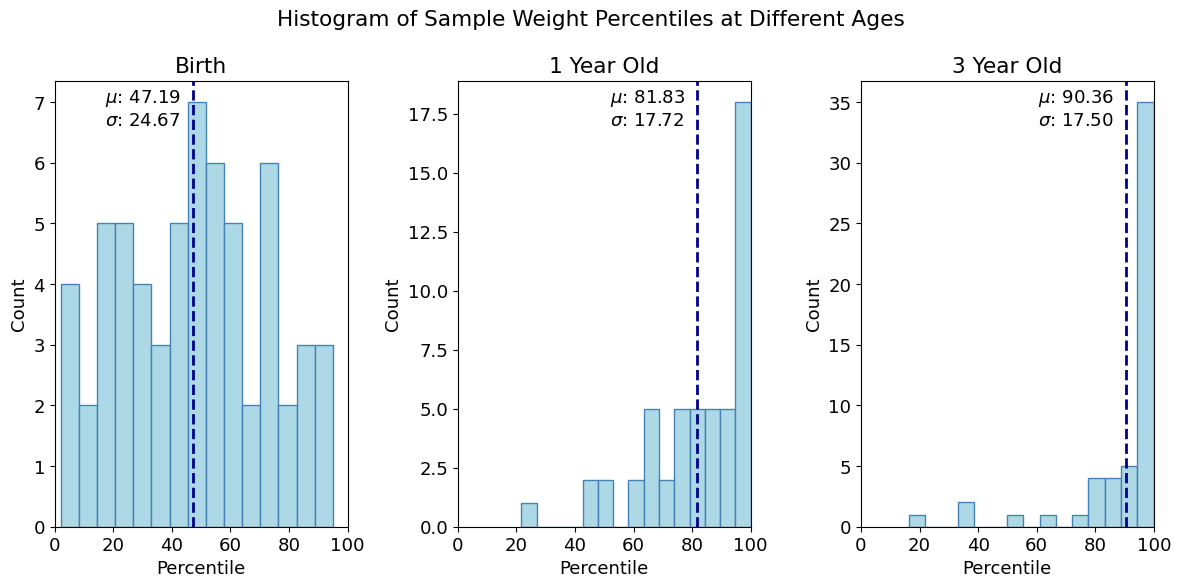

In [17]:
# Histograms of sample weight percentiles
plt.rcParams.update({'font.size': 13}) #default is 10
fig, axes = plt.subplots(1,3, figsize=(12,6))

vars=['birth_wt_pct', '1yr_wt_pct', '3yr_wt_pct']

for i, var in enumerate(vars):
    mean_pct = np.mean(df_cleaned[var])
    std_pct = np.std(df_cleaned[var])
    axes[i].hist(df_cleaned[var], bins=15, color='lightblue', edgecolor='steelblue')
    axes[i].axvline(mean_pct, color='darkblue', linestyle='dashed', linewidth=2)
    axes[i].text(mean_pct - 30, axes[i].get_ylim()[1]*0.9, f"$\mu$: {mean_pct:.2f}\n$\sigma$: {std_pct:.2f}")
    axes[i].set_xlim(0, 100)
    axes[i].set_xlabel('Percentile')
    axes[i].set_ylabel('Count')

axes[0].set_title('Birth')
axes[1].set_title('1 Year Old')
axes[2].set_title('3 Year Old')
fig.suptitle('Histogram of Sample Weight Percentiles at Different Ages')
plt.tight_layout()
plt.show()

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_937884/380733162.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.text(1,sample_means[0]+10, f'$\mu$: {sample_means[0]:.2f} \n $\sigma^2$: {sample_vars[0]:.2f}', ha='center', fontsize=10)
/tmp/ipykernel_937884/380733162.py:19: SyntaxWarning: invalid escape sequence '\s'
  plt.text(1,sample_means[0]+10, f'$\mu$: {sample_means[0]:.2f} \n $\sigma^2$: {sample_vars[0]

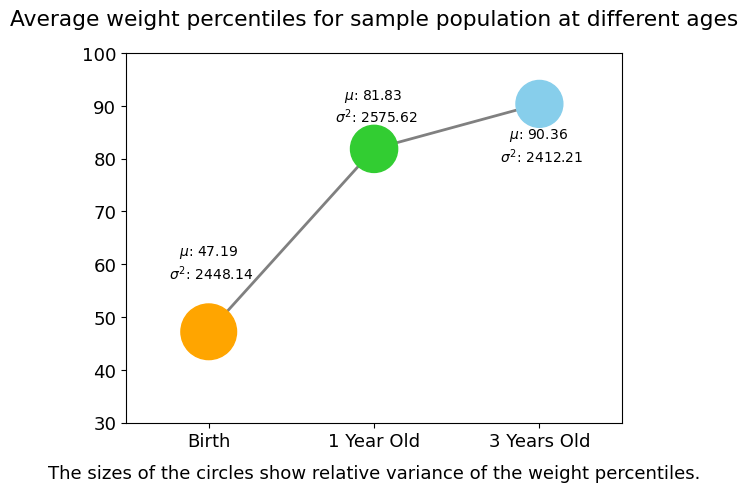

In [18]:
# Line plot of sample weight percentiles
sample_means = []
sample_vars = []
s = []
for i,var in enumerate(vars):
    sample_means.append(np.mean(df_cleaned[var]))
    sample_vars.append(np.std(df_cleaned[var]**2))
    s.append(np.std(df_cleaned[var])*65)

plt.plot([1,2,3], sample_means, linestyle='-', color='grey', linewidth=2, zorder=1)
plt.scatter([1,2,3], sample_means, color=['orange','limegreen','skyblue'], s=s, zorder=2)
plt.xticks([1,2,3],['Birth', '1 Year Old', '3 Years Old'])
plt.xlim([0.5,3.5])
plt.ylim([30,100])
plt.title("Average weight percentiles for sample population at different ages", pad=20)
plt.text(0.5, -0.15, "The sizes of the circles show relative variance of the weight percentiles.", ha='center', transform=plt.gca().transAxes)

# Text for each dot
plt.text(1,sample_means[0]+10, f'$\mu$: {sample_means[0]:.2f} \n $\sigma^2$: {sample_vars[0]:.2f}', ha='center', fontsize=10)
plt.text(2,sample_means[1]+5, f'$\mu$: {sample_means[1]:.2f} \n $\sigma^2$: {sample_vars[1]:.2f}', ha='center', fontsize=10)
plt.text(3,sample_means[2]-11, f'$\mu$: {sample_means[2]:.2f} \n $\sigma^2$: {sample_vars[2]:.2f}', ha='center', fontsize=10)



plt.show()

In [19]:
np.sqrt(sample_vars)

array([49.47866761, 50.75051726, 49.11429712])

**ASSESSING FOR MISSING VALUES**

In [20]:
df_cleaned2 = df_cleaned.drop(columns=['current_age', 'current_wt_pct', 'current_wt_kg', 'current_bmi', 'current_bmi_pct'])
df_cleaned2.isnull().sum()

id                   0
race                10
sex                  0
birth_wt_kg          0
gest_age             0
birth_wt_pct         0
size_category        0
insurance_type       1
4mo_feeding_type    17
6mo_feeding_type    10
1yr_wt_pct          10
3yr_wt_pct           8
3yr_bmi_pct         12
age_on_obes         11
dtype: int64

In [23]:
df_cleaned2.drop(columns=['race', 'insurance_type', '6mo_feeding_type', 'age_on_obes']).isnull().sum()

id                   0
sex                  0
birth_wt_kg          0
gest_age             0
birth_wt_pct         0
size_category        0
4mo_feeding_type    18
1yr_wt_pct          11
3yr_wt_pct           8
3yr_bmi_pct         12
dtype: int64

In [45]:
df_cleaned2.drop(columns='age_on_obes')['size_category'].value_counts()

size_category
AGA    52
SGA     3
LGA     3
Name: count, dtype: int64

In [52]:
df_cleaned2.loc[(df_cleaned2['size_category']=='SGA') | (df_cleaned2['size_category']=='LGA')]

,id,race,sex,birth_wt_kg,gest_age,birth_wt_pct,size_category,insurance_type,6mo_feeding_type,1yr_wt_pct,3yr_wt_pct,3yr_bmi_pct,age_on_obes
13,14,White,F,2.815,40.857143,5.0,SGA,Public,Formula Feeding,66.10,91.28,NaN,4.416667
20,21,Black,M,2.920,34.428571,91.0,LGA,Public,Formula Feeding,60.26,75.12,48.91,4.166667
45,46,Black,F,4.281,FT,94.0,LGA,Public,Formula Feeding,99.99,99.99,NaN,0.083333
50,51,Hispanic,F,2.523,40,2.0,SGA,Public,Formula Feeding,74.78,98.21,99.38,1.583333
87,88,Other,M,2.551,38.857143,4.0,SGA,Public,Formula Feeding,67.39,99.42,98.39,2.666667
91,92,Other,F,4.355,40.142857,95.0,LGA,Public,Formula Feeding,99.94,99.99,99.99,NaN


**CORRELATIONS**

In [27]:
import seaborn as sns

In [28]:
df_imp = pd.read_csv('df_regression_imp.csv')

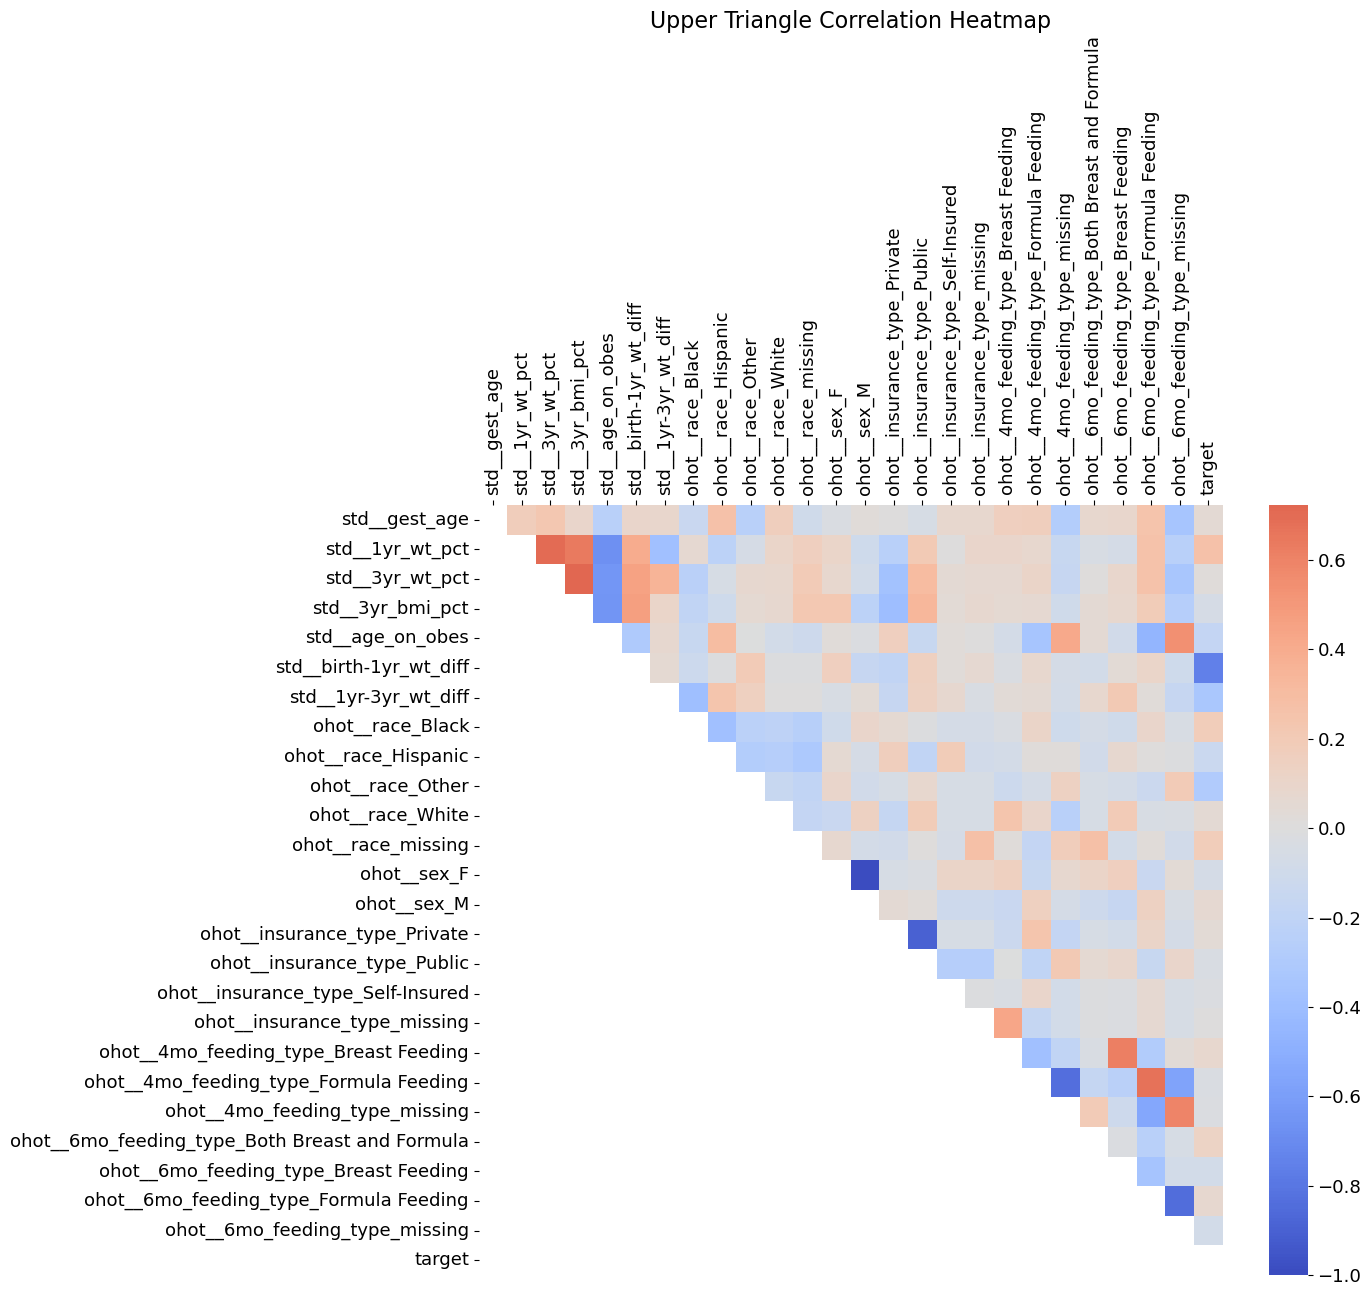

In [42]:
corr = df_imp.corr()

mask = np.tril(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, annot=False)
plt.title('Upper Triangle Correlation Heatmap', fontsize=16)
plt.gca().xaxis.tick_top() 
plt.xticks(rotation=90)
# Move x-axis labels to top
plt.show()
